<a href="https://colab.research.google.com/github/carmsanchezs/regresion_lineal_multiple_facebook_ex/blob/main/Regresion_lineal_multiple_facebook_likes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo de regresión Lineal multiple**

Ejemplo basado en el siguiente video:

[Regresión Lineal Múltiple | SciKitLearn | Machine Learning| Python | ¡Muy básico!
](https://youtu.be/y3eC8uboZds)

Donde también dan esta información para el obtener el **dataset**

✔Artículo sobre información de Facebook:
[http://bit.ly/FBpaperAlgo](http://bit.ly/FBpaperAlgo)

✔ Base de datos del artículo de Facebook:
[http://bit.ly/hackathonAlgo](http://bit.ly/hackathonAlgo)

In [ ]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Estílo de las gráficas
sns.set_style('darkgrid')

# Análizando la información

In [ ]:
# Carga de datos
df = pd.read_csv('dataset/dataset_Facebook.csv')

In [ ]:
# Interpretación
# 500 registros
# 19 columnas
# con tipos de datos, int65, float64 y object
# las columnas: Paid, like y share tienen datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

## Investigando la correlación

Vemos que la existe una relación lineal entre **Interations** y **likes**

1.   Por los valores de correlación
2.   Por las graficas



In [ ]:
# Renombrando columnas
dataset = df[['Total Interactions','Post Weekday', 'like', 'Post Hour']]
dataset.rename(columns={
    'Total Interactions': 'interactions', 
    'Post Weekday': 'days',
    'like': 'likes',
    'Post Hour':'hour'}, inplace=True)
# Determinando correlación entre las columnas
dataset.corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,interactions,days,likes,hour
interactions,1.000000,-0.081049,0.997705,-0.027421
days,-0.081049,1.000000,-0.082322,0.045857
likes,0.997705,-0.082322,1.000000,-0.024523
hour,-0.027421,0.045857,-0.024523,1.000000


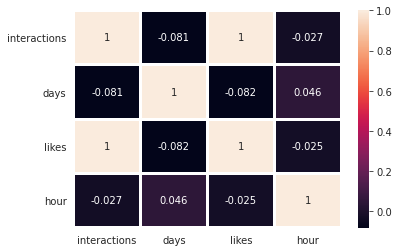

In [ ]:
# graficando correlación entre variables
# la correlación permite, a través de un valor numérico, saber la relación entre dos variables
# Interpretación: Tenemos una relación directa entre "interactions" vs "likes"
sns.heatmap(dataset.corr(), annot=True, linewidths=2)

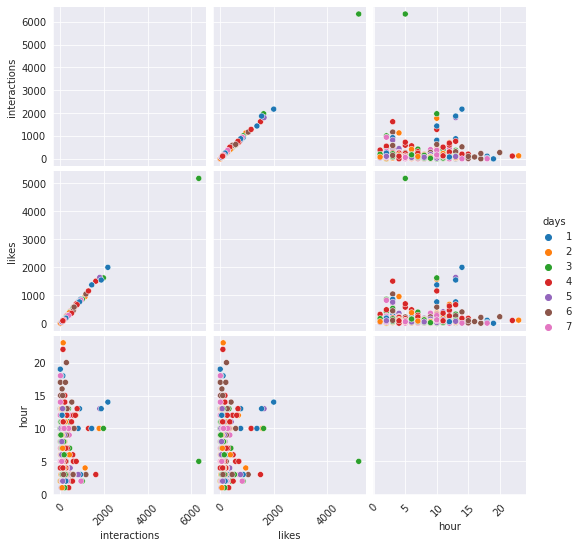

In [ ]:
# Graficando la relación entre las variables con diagramas de dispersión
# el día 1 es domingo y la semana termina con el día 7 que es sábado
# interpretación: 
# "hour" vs "likes", se observa mayor cantidad de likes los días martes y miércoles y una menos con respecto a sábados.
# "interaction" vs "likes" se observa que hay el comportamiento es similar a una línea recta.
# y que el sábado no es una muy buen día para publicar.
g = sns.pairplot(dataset, hue='days', diag_kind='reg', palette='tab10')
for ax in g.axes.flat:
  plt.setp(ax.get_xticklabels(), rotation=45)

# Modelo de regresión lineal
$ y = B_{0} x_{0} + B_{1} x_{1} + B_{2} x_{2}$

## Módelo **propuesto**
$ likes = B_{0} hora + B_{1} dia + B_{2} interaccion$

In [ ]:
# se remplazan los nan por 0
dataset = dataset.replace(np.nan, 0)

In [ ]:
# Definiendo el la matriz de variables independientes
X = dataset[['hour','days','interactions']]
X

,hour,days,interactions
0,3,4,100
1,10,3,164
2,3,3,80
3,10,2,1777
4,3,2,393
...,...,...,...
495,2,7,84
496,8,5,75
497,2,5,115
498,11,4,136


In [ ]:
# Definiendo el arreglo de la variable dependiente
Y = dataset['likes']
Y

0        79.0
1       130.0
2        66.0
3      1572.0
4       325.0
        ...  
495      53.0
496      53.0
497      93.0
498      91.0
499      91.0
Name: likes, Length: 500, dtype: float64

In [ ]:
# Calculando la regresión lineal multiple
reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
# Determinado el error
error = np.sqrt(mean_squared_error(Y, Y_pred))
# Determinando el error cuadrático, entre más cercano a 1 el valor de la correlación es mejor.
r2 = reg.score(X, Y)

print("El error es: {}".format(error))
print("El error de r2 es: {}".format(r2))
print("Los coeficientes son: {}".format(reg.coef_))


El error es: 21.81953867915251
El error de r2 es: 0.9954323615919498
Los coeficientes son: [ 0.21551007 -0.40017767  0.84787796]


In [ ]:
# Ejemplo de predicción
hour = 17
days = 1
interactions = 150
print("Likes de predicción: {}".format(reg.predict(
    [[hour, days, interactions]]
)))

Likes de predicción: [128.15445304]


In [ ]:
# comparando con los datos reales
dataset.query('interactions >= 148 and interactions <= 152 and hour > 10').sort_values('interactions')

,interactions,days,likes,hour
275,148,3,98.0,13
284,152,6,129.0,12
